# Loan Status Prediction

#### Problem Statement:

About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

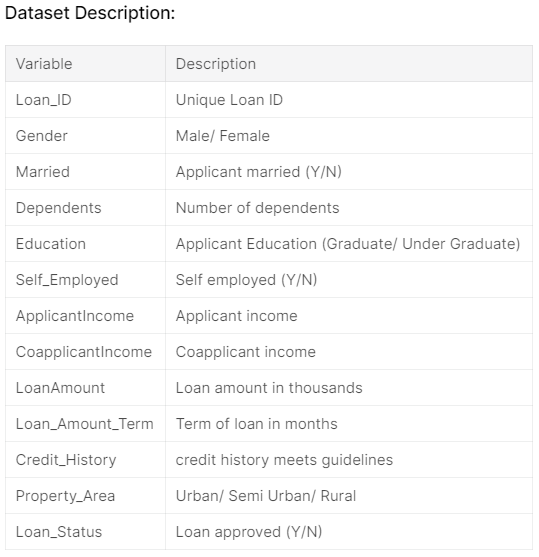

## Hypothesis

Hypothesis are all the possible factors that can affect the outcome i.e. which of the features will have an impact on whether a loan will be approved or not. Some of them are:

1. Education - Applicants with higher education level i.e. graduate level should have higher chances of loan approval
2. Income: Applicants with higher income should have more chances of loan approval
3. Loan amount: If the loan amount is less, the chances of loan approval should be high
4. Loan term: Loans with shorter time period should have higher chances of approval
5. Previous credit history: Applicants who have repayed their previous debts should have higher chances of loan approval
6. Monthly installment amount: If the monthly installment amount is low, the chances of loan approval should be high

And so on. Some of the hypothesis seem intuitive while others may not. We will try to validate each of these hypothesis based on the dataset.

## Exploratory Data Analysis

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
sns.set(style="ticks", context = 'talk', palette = 'bright', rc={'figure.figsize':(11.7,8.27)})

### Loading the dataset

In [ ]:
df = pd.read_csv('../input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')

In [ ]:
df.head()

In [ ]:
print('Dataset has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

In [ ]:
df.dtypes

Looking at the datatypes it is found that there are a lot of categorical variables like Education, Self-Employed, Married, Gender, Dependents, Property Area and Loan Status. There a few numerical variables like Applicant Income, Loan Amount, Loan Amount Term, Credit History and Co-applicant income.



In [ ]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [ ]:
df.describe()

After having a look at the following description it is known that there are missing values in our dataset. So for that we will either fill the missing values with some value or we will discard those particular rows.

Our target variable is not evenly distributed, i.e. more than 65% of the loans were approved while the rest were not.

### Missing Values

To start with data analysis we whould first remove/fill the missing values if any.

In [ ]:
df.isnull().sum()

So gender, married, dependents, self-employed, loan amount, loan amount term and credit history have null values

So first lets have a look at the variables and their distribution

Gender

In [ ]:
df['Gender'].value_counts()

As the majority of the aplicants are male we would simply fill the null values with Male gender.

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

Married

In [ ]:
df['Married'].value_counts()

Again the majority of the applicants are married we would replace the 3 null values with "Yes"

In [ ]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

Dependents

In [ ]:
df['Dependents'].value_counts()

In [ ]:
sns.countplot(x='Dependents', hue='Married', data=df)

So the applicant will be having higher probability of having a dependent when he is married. Otherwise the applicant would not have dependent. This would refer to having a child after marriage, so the child would be the dependent in this case. 

In [ ]:
df['Dependents'].fillna(df['Married'], inplace=True)
df['Dependents'] = df['Dependents'].apply(lambda x : {'No' : 0, 'Yes' : 1, '0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])

In [ ]:
df.loc[df['Dependents'].isna() & (df['Married'] == 'Yes')]['Dependents'].fillna('1', inplace=True)

Self-employed

In [ ]:
df['Self_Employed'].value_counts()

So nearly 85% of the applicants are not employed. So filling the null values as not employed.

In [ ]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

Loan Amount

In [ ]:
df['LoanAmount'].describe()

In [ ]:
sns.distplot(df['LoanAmount'], rug = True, color = 'r')

So simply filling the loan value with mean amount is not a good idea. Instead we should replace null according to the loan status i.e. if LoanStatus is YES then replace with the mean of approved loan amount and if it is NO then replace with the mean of unapproved loan amount. 

In [ ]:
df[~df['LoanAmount'].isnull()].groupby('Loan_Status').describe().T.loc['LoanAmount']

So for approved loans the mean is 151.22 and for unapproved loans the mean is 144.29

In [ ]:
for row in range(df.shape[0]):
        if pd.isnull(df.loc[row, 'LoanAmount']):
            if df.loc[row, 'Loan_Status'] == 'Y':
                df.loc[row, 'LoanAmount'] = 151.22
            elif df.loc[row, 'Loan_Status'] == 'N':
                df.loc[row, 'LoanAmount'] = 144.29
            else:
                pass

Loan Amount Term

In [ ]:
df['Loan_Amount_Term'].describe()

In [ ]:
df['Loan_Amount_Term'].value_counts()

Nearly 80% of the applicants loan amount terms were 360

In [ ]:
df[~df['Loan_Amount_Term'].isnull()].groupby('Loan_Status').describe().T.loc['Loan_Amount_Term']

So for both the cases mean was of 360 so replcaing null values with 360

In [ ]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

Credit History

In [ ]:
df['Credit_History'].describe()

In [ ]:
df['Credit_History'].value_counts()

In [ ]:
df[~df['Credit_History'].isnull()].groupby('Loan_Status').describe().T.loc['Credit_History']

Since more than 75% applicants have credit history as 1 we will replace null values with 1.0

In [ ]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

So now there are no null values and we will continue with univariate and bivariate analysis

## Univariate Analysis

### *Target Variable (Categorical Yes/No )*

In [ ]:
df['Loan_Status'].value_counts()

In [ ]:
df['Loan_Status'].value_counts(normalize=True)

In [ ]:
sns.countplot(x = 'Loan_Status', data = df)

So the data is kind of balanced as it is 68% of Yes and 32% of No. So there is no need to remove samples

### *Other Categorical Variable*

In [ ]:
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

From the above plots it is found that:
* Around 80% of the applicants are Male
* More than 60% applicants are married
* More than 80% applicants are not self-employed
* More than 80% applicants have repaid their debts (credit history)
* Around 80% applicants are Graduates.

### *Ordinal Variables*

In [ ]:
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

From the above plots it is found that:
* Majority of the applicants dont have any dependents.
* Most of the applicants reside in semi urban regions.

### *Numerical Variables*

In [ ]:
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Here it is observed that the data is not normally distributed. The above data is right skewed, so we would want to remove this skewness as the ML algorithms tend to work better if the data is normally distributed. Also the Applicant Income has a lot of outliers, we need to remove the outliers as they would create problem while model training.

The extreme values/outliers at the applicant income can be caused by education, as people with different education have different income. Lets check that

In [ ]:
df.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

So graduates having higher income tend to be the outliers for us.

In [ ]:
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

There is a similar distribution in case of coapplicant income.

In [ ]:
plt.subplot(121)
sns.distplot(df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

The LoanAmount seems to be fairly normally distributed. But it is slightly right skewed. There are a lot of outliers in case of LoanAmount. We will have to treat them.

In [ ]:
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title='Loan Amount Term')

About 85% of the applicants have applied for a term of 360 months i.e. 30 years.

## Bivariate Analysis

Now we have to check how each feature goes with the loan status, i.e. the correltaion with the target variable.

### *Independent Variable v/s Target Variable*

In [ ]:
Gender = pd.crosstab(df['Gender'], df['Loan_Status'])
print(Gender)
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked=True)
plt.ylabel('Percentage')

Here the crosstab feature provides us the count of males and female whose loan is accepted and not accpeted.

In [ ]:
Married = pd.crosstab(df['Married'], df['Loan_Status'])
print(Married)
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked=True)
plt.ylabel('Percentage')

In [ ]:
Edu = pd.crosstab(df['Education'], df['Loan_Status'])
print(Edu)
Edu.div(Edu.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked=True)
plt.ylabel('Percentage')

In [ ]:
SE = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
print(SE)
SE.div(SE.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked=True)
plt.ylabel('Percentage')

In [ ]:
CH = pd.crosstab(df['Credit_History'], df['Loan_Status'])
print(CH)
CH.div(CH.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked=True)
plt.ylabel('Percentage')

In [ ]:
prop = pd.crosstab(df['Property_Area'], df['Loan_Status'])
print(prop)
prop.div(prop.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked=True)
plt.ylabel('Percentage')

In [ ]:
dep = pd.crosstab(df['Dependents'], df['Loan_Status'])
print(dep)
dep.div(dep.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked=True)
plt.ylabel('Percentage')

In [ ]:
term = pd.crosstab(df['Loan_Amount_Term'], df['Loan_Status'])
print(term)
term.div(term.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked=True)
plt.ylabel('Percentage')

From the above plots we can infer that: 
* Applicant having a bad credit history will not get the loan. 
* Gender and Self-employed don't play a huge role in determining the loan status, i.e. irrespective of the gender and self-employement the applicant's loan approval chances are high.
* Married applicants have higher chance of loan approval
* Applicants who have graduated have higher chance of loan approval.
* Applicants living in semi-urban areas are likely to get loan approval ahead of urban and rural area applicants.
* Applicants having 2 dependents are likely to get loan approval as compared to other.
* Since most of the applicants apply for 30 years term we can observe that there is a good chance of approval for 30 years term.

## *Numerical v/s Target Variable*

Now lets look at the relation of variables like LoanAmount, ApplicantIncome, CoapplicantIncome, Loan_Amount_term with the LoanStatus

In [ ]:
print(df.groupby('Loan_Status')['ApplicantIncome'].mean())

df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.ylabel('Applicant Income')

There is not much difference in applicant income for approval and disapproval of the loan.
So we have to make bins i.e. sections like low income, average income, high income.

In [ ]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
df['Income_bins'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

Income_bin = pd.crosstab(df['Income_bins'],df['Loan_Status'])
print(Income_bin)
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [ ]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
df['Co_Income_bins'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

CoIncome_bin = pd.crosstab(df['Co_Income_bins'],df['Loan_Status'])
print(CoIncome_bin)
CoIncome_bin.div(CoIncome_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Co-Applicant Income')
P = plt.ylabel('Percentage')

We have to check what percentage of co applicants income is 0

In [ ]:
print("{:.2f}% of Co-applicant's income is 0".format(len(df[df['CoapplicantIncome'] == 0])/len(df)*100))

Such a huge number of co-applicants have 0 income so we will combine both the income and then see the result.

In [ ]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
df['Total_Income_bins'] = pd.cut(df['Total_Income'],bins,labels=group)

Total_Income_bin = pd.crosstab(df['Total_Income_bins'],df['Loan_Status'])
print(Total_Income_bin)
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total Income')
P = plt.ylabel('Percentage')

In [ ]:
bins = [0,100,300,700]
group = ['Low','Average','High']
df['LoanAmount_bins'] = pd.cut(df['LoanAmount'],bins,labels=group)

Loan_bin = pd.crosstab(df['LoanAmount_bins'],df['Loan_Status'])
print(Loan_bin)
Loan_bin.div(Loan_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Loan Amount')
P = plt.ylabel('Percentage')

With the above plots we can say that our hypothesis hold true, as applicant with low income are quite likey to not get the loan approval and also if the loan amount is high the loan approval chances becomes less.

So now we should drop the bins we have created.

In [ ]:
df.drop(['Income_bins', 'Co_Income_bins', 'Total_Income', 'Total_Income_bins', 'LoanAmount_bins'], axis=1, inplace=True)

In [ ]:
df.columns

Now we should check the correlation among the numerical features.

In [ ]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x : {'N' : 0, 'Y' : 1}[x])

In [ ]:
sns.heatmap(df.corr(), square=True, cmap='BuPu', annot=True)

As per our hypothesis loan amount and income are correlated to each other. Also credit history and loan status are strongly correlated with each other.

# Data Pre-processing

Earlier we replaced the null values with the correct values. Now we will do outlier treatment.

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Having outliers in the dataset often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness (or positive skewness). One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

In [ ]:
ax1 = plt.subplot(121)
df['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Loan Amount")

In [ ]:
df['LoanAmount'] = np.log(df['LoanAmount'])

In [ ]:
ax1 = plt.subplot(121)
df['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Loan Amount")

Since Loan_ID is not useful we will drop that

In [ ]:
df.drop('Loan_ID', axis=1, inplace=True)

Before we build our model we have to convert the categorical values into numbers. This can be done by simply replacing the values with 0, 1, 2 and so on. Or we can do a pd.get_dummies() to create a new dataframe with such data.

In [ ]:
df['Property_Area'].unique()

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x : {'Male' : 1, 'Female' : 0}[x])
df['Married'] = df['Married'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])
df['Education'] = df['Education'].apply(lambda x : {'Graduate' : 1, 'Not Graduate' : 0}[x])
df['Self_Employed'] = df['Self_Employed'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])
df['Property_Area'] = df['Property_Area'].apply(lambda x : {'Semiurban': 2, 'Urban' : 1, 'Rural' : 0}[x])
df.dtypes

# Model Building

Before model building lets have a look at our data

In [ ]:
df.head()

In [ ]:
df.describe()

Everything is at its place so now lets start with model building. 

Firstly we have to seperate the features and target

In [ ]:
X = df.drop('Loan_Status', axis=1)
Y = df['Loan_Status']

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost Classifier']
accs = []
f1 = []
aucs = []

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report, roc_curve, roc_auc_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accs.append(np.mean(y_pred==y_test)*100)
f1.append(f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

aucs.append(auc)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

The model performance is pretty good as we get a precision of 83% and recall of 99%

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accs.append(np.mean(y_pred==y_test)*100)
f1.append(f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(12,8))

aucs.append(auc)

plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accs.append(np.mean(y_pred==y_test)*100)
f1.append(f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

aucs.append(auc)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, n_estimators=50, max_depth=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accs.append(np.mean(y_pred==y_test)*100)
f1.append(f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

aucs.append(auc)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
report = pd.DataFrame({'Models': models, 'Accuracy': accs, 'F1-Score': f1, 'AUC': aucs})
report.sort_values('F1-Score', inplace=True, ascending=False)

In [ ]:
report

## Improvements to be done:
* Feature engineering can be done, for example new features like total income, emi can be created using the current set of features
* Use cross validation techniques to train the models. Techniques like k-fold cross validation, stratified cross validation and look out once cross validation can be used to get better results.
* Comparison of features with others can be done, for example comparing the income with gender and so on. With this new patterns will be noticed and hence hypothesis generation will be enhanced.
* One could use neural networks to train the model. Libraries like sklearn having MLP classifier, keras, tensorflow, pytorch can be used.